#**importing essential libraries**

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#**import dataset**

In [244]:
df = pd.read_csv("/content/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2846,0541-FITGH,Female,0,Yes,No,2,Yes,No,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,62.15,113.1,No
3234,8173-RXAYP,Female,0,Yes,Yes,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,452.55,No
1005,2858-EIMXH,Female,1,Yes,No,53,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),95.85,5016.25,No
4515,9274-UARKJ,Female,0,No,No,15,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),83.20,1130,No
6995,7164-BPTUT,Male,0,No,Yes,57,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.55,5012.35,No


#**data cleaning**

In [245]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [246]:
#removing invalid or not useful columns
df.drop(columns=["customerID"],inplace= True)

In [247]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [248]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [249]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [250]:
df.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5500,Male,0,Yes,Yes,60,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Bank transfer (automatic),60.5,3694.45,No


In [251]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [252]:
df["SeniorCitizen"].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [253]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [254]:
1869/(1869+5174)*100

26.536987079369588

26 % already churned

In [255]:
#data visuallization
df.describe(include = "object")

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [256]:
#printing uniques in object columns

df_obj = df.select_dtypes(include="object").columns

In [257]:
df_obj

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [258]:
for i in df_obj:
    print(f"{i}:{df[i].unique()}")
    print("_"* 50)

gender:['Female' 'Male']
__________________________________________________
Partner:['Yes' 'No']
__________________________________________________
Dependents:['No' 'Yes']
__________________________________________________
PhoneService:['No' 'Yes']
__________________________________________________
MultipleLines:['No phone service' 'No' 'Yes']
__________________________________________________
InternetService:['DSL' 'Fiber optic' 'No']
__________________________________________________
OnlineSecurity:['No' 'Yes' 'No internet service']
__________________________________________________
OnlineBackup:['Yes' 'No' 'No internet service']
__________________________________________________
DeviceProtection:['No' 'Yes' 'No internet service']
__________________________________________________
TechSupport:['No' 'Yes' 'No internet service']
__________________________________________________
StreamingTV:['No' 'Yes' 'No internet service']
__________________________________________________
StreamingM

In [259]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [260]:
SeniorCitizen_churn_yes = df[df["Churn"]=="Yes"]["SeniorCitizen"]
SeniorCitizen_churn_no = df[df["Churn"]=="No"]["SeniorCitizen"]
print(SeniorCitizen_churn_yes)
print(SeniorCitizen_churn_no)

2       0
4       0
5       0
8       0
13      0
       ..
7021    0
7026    0
7032    1
7034    0
7041    1
Name: SeniorCitizen, Length: 1869, dtype: int64
0       0
1       0
3       0
6       0
7       0
       ..
7037    0
7038    0
7039    0
7040    0
7042    0
Name: SeniorCitizen, Length: 5174, dtype: int64


In [261]:
for i in df_obj:
    if df[i].nunique() >2:
        print(f"{i} : {df[i].unique()}")
        print("_"*50)

MultipleLines : ['No phone service' 'No' 'Yes']
__________________________________________________
InternetService : ['DSL' 'Fiber optic' 'No']
__________________________________________________
OnlineSecurity : ['No' 'Yes' 'No internet service']
__________________________________________________
OnlineBackup : ['Yes' 'No' 'No internet service']
__________________________________________________
DeviceProtection : ['No' 'Yes' 'No internet service']
__________________________________________________
TechSupport : ['No' 'Yes' 'No internet service']
__________________________________________________
StreamingTV : ['No' 'Yes' 'No internet service']
__________________________________________________
StreamingMovies : ['No' 'Yes' 'No internet service']
__________________________________________________
Contract : ['Month-to-month' 'One year' 'Two year']
__________________________________________________
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit c

#**DATA ANALYSIS**

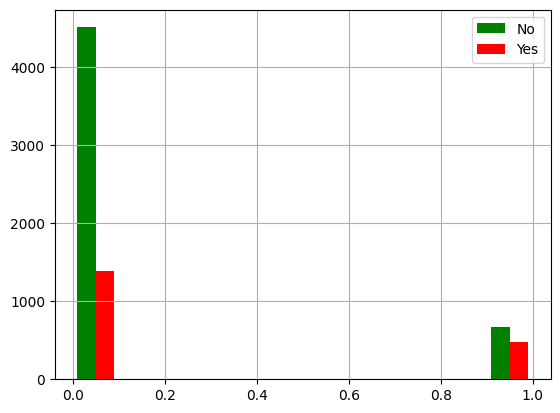

In [262]:
plt.hist([SeniorCitizen_churn_no,SeniorCitizen_churn_yes],color = ["Green","red"],label = ["No","Yes"])
plt.legend()
plt.grid(True)
plt.show()

In [263]:
# senior_churn = df.groupby("SeniorCitizen")["Churn"]
# import matplotlib.pyplot as plt
# senior_churn

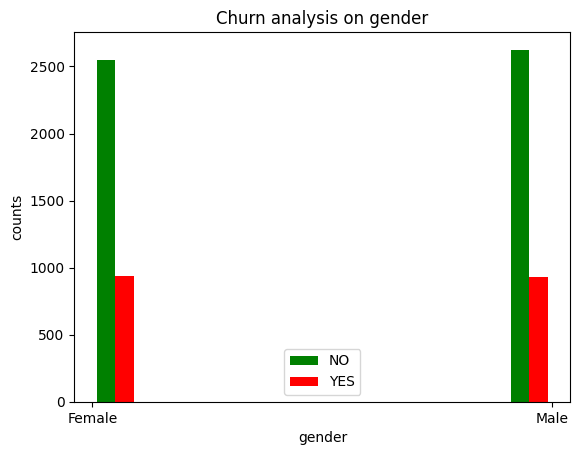

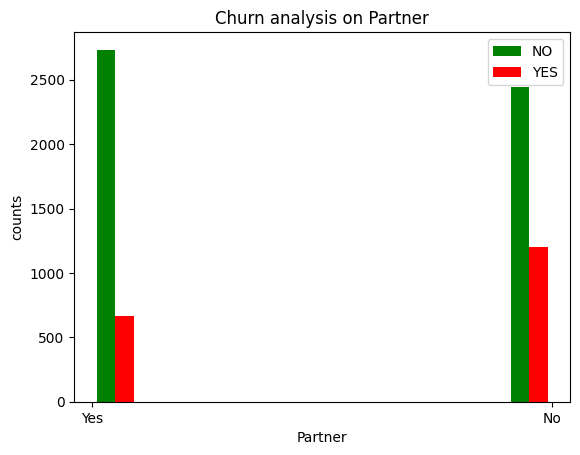

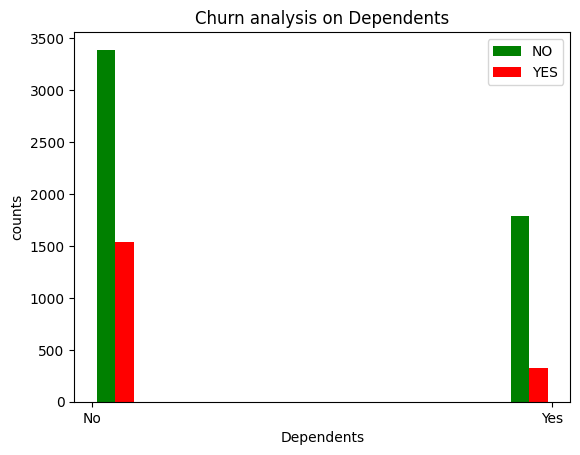

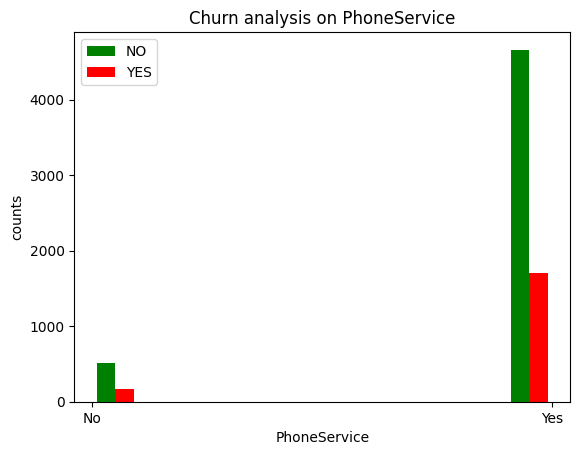

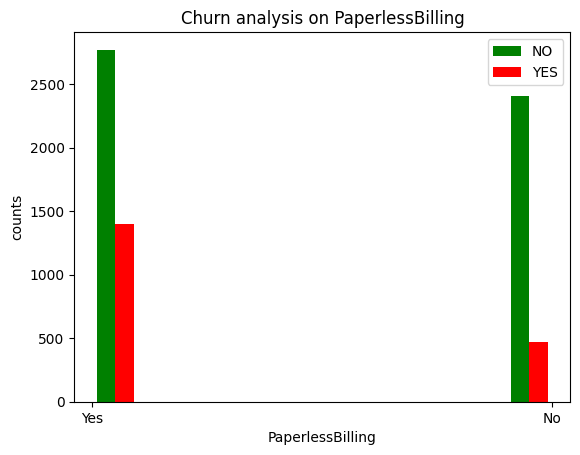

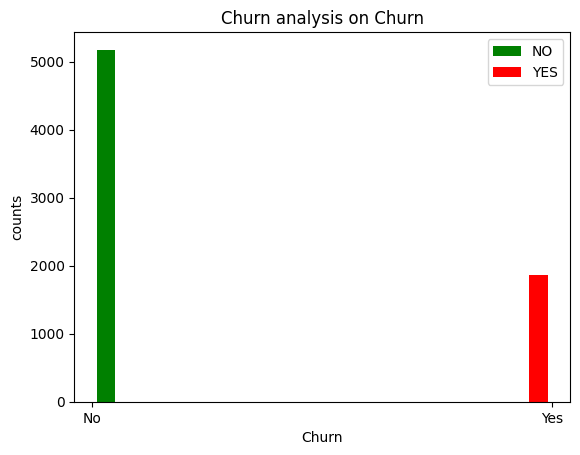

In [264]:
for i in df_obj:
    if df[i].nunique() == 2:
        churn_yes = df[df["Churn"] == "Yes"][i]
        churn_no = df[df["Churn"] == "No"][i]
        plt.hist([churn_no, churn_yes], color = ["Green","Red"],label = ["NO","YES"])
        plt.legend()
        plt.xlabel(i)
        plt.ylabel("counts")
        plt.title(f"Churn analysis on {i}")
        plt.show()

In [265]:
df.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5131,Female,0,Yes,No,44,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.1,4364.1,Yes


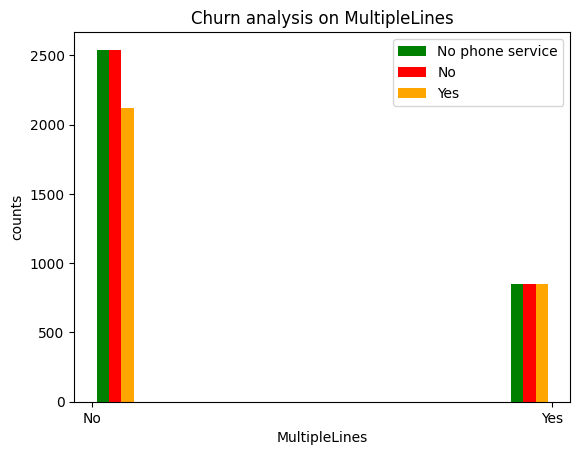

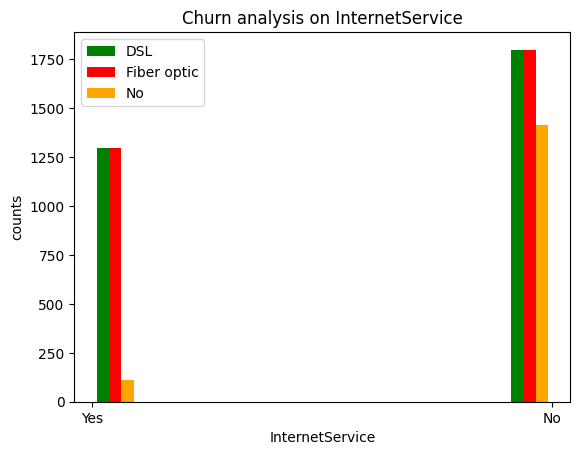

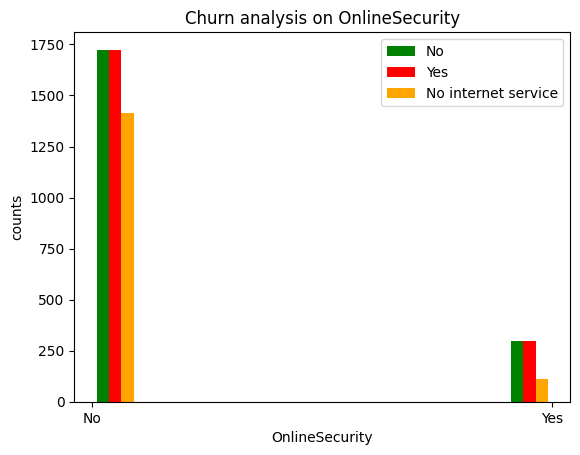

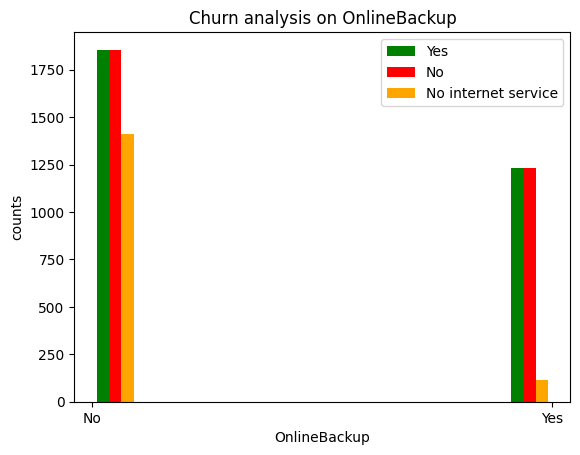

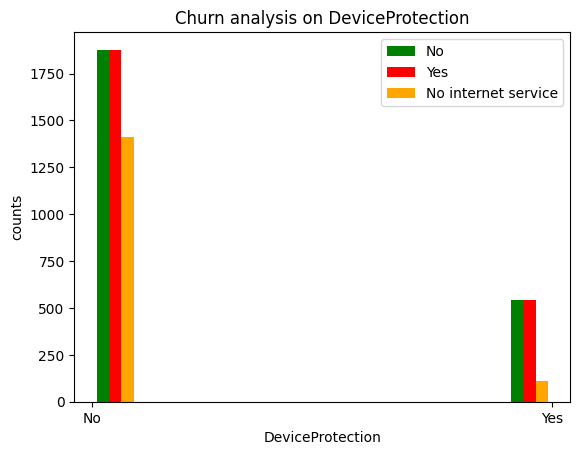

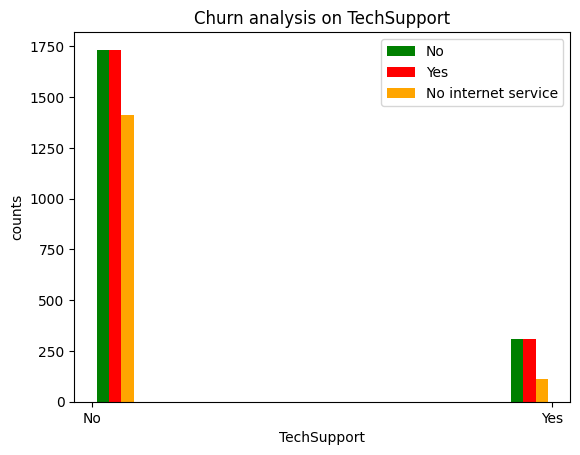

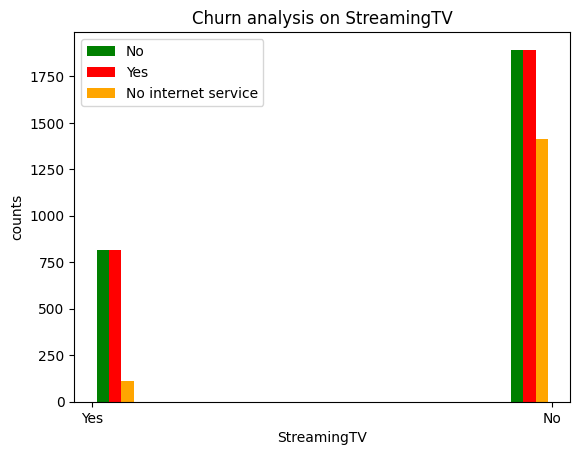

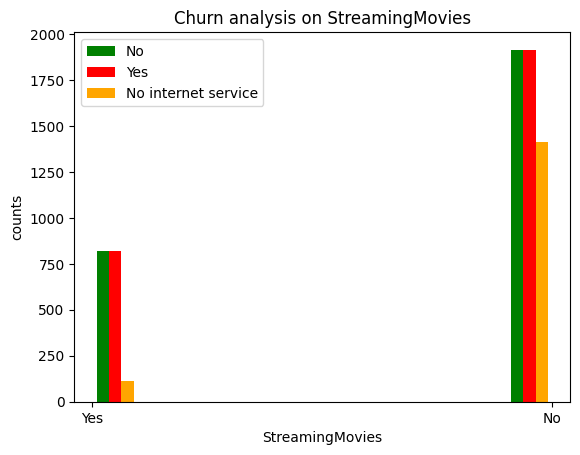

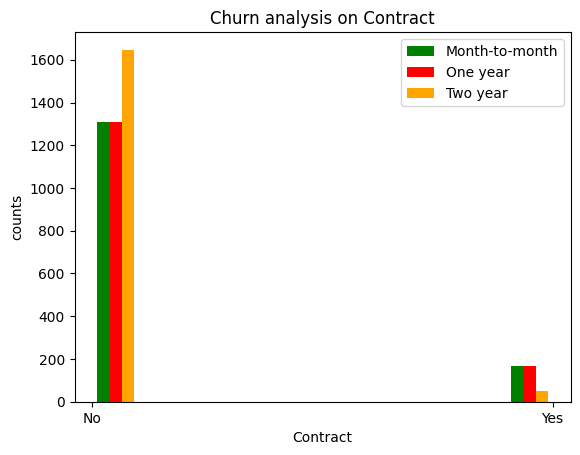

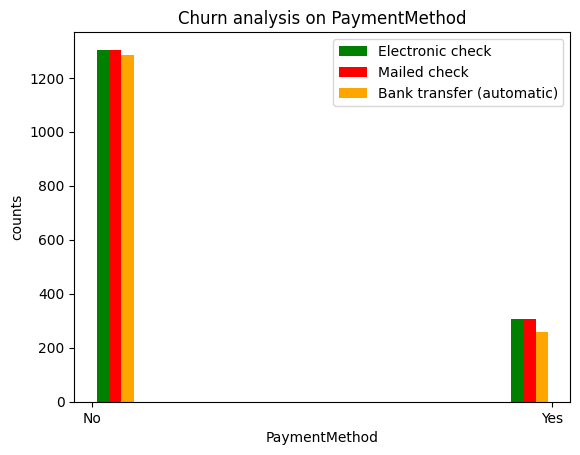

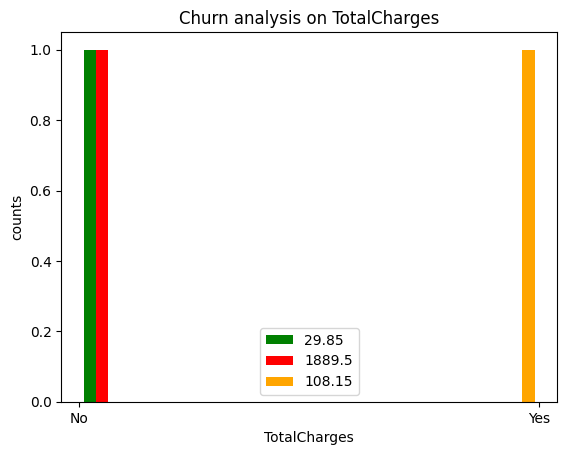

In [266]:
for i in df_obj:
    if df[i].nunique() >2:
       first_unique = df[df[i] == df[i].unique()[0]]["Churn"]
       first_unique = df[df[i] == df[i].unique()[1]]["Churn"]
       third_unique = df[df[i] == df[i].unique()[2]]["Churn"]
       plt.hist([first_unique, first_unique,third_unique], color = ["Green","Red","Orange"],label = (df[i].unique()[0],df[i].unique()[1],df[i].unique()[2]))
       plt.legend()
       plt.xlabel(i)
       plt.ylabel("counts")
       plt.title(f"Churn analysis on {i}")
       plt.show()

In [267]:
# df[df["TotalCharges"]]["Churn"].value_counts()
df.groupby(by = "Churn")["TotalCharges"].value_counts()

Churn  TotalCharges
No                     11
       19.75            7
       19.55            6
       19.65            6
       20.05            6
                       ..
Yes    990.9            1
       994.55           1
       994.8            1
       997.65           1
       999.45           1
Name: count, Length: 6698, dtype: int64

In [268]:
df = df[df["TotalCharges"] != " "]

In [269]:
df['TotalCharges'] = pd.to_numeric(df["TotalCharges"],errors = "coerce").astype("int64")

In [270]:
import pandas as pd

# Create bins for TotalCharges and assign each customer to a bin.
bins = pd.qcut(df['TotalCharges'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Add the bin labels as a new column to the DataFrame.
df['TotalCharges_Bin'] = bins

# Group by the bins and Churn to get the churn rate for each bin.
churn_by_bin = df.groupby('TotalCharges_Bin')['Churn'].value_counts(normalize=True)

print(churn_by_bin)

TotalCharges_Bin  Churn
Low               No       0.566156
                  Yes      0.433844
Medium            No       0.746583
                  Yes      0.253417
High              No       0.769493
                  Yes      0.230507
Very High         No       0.854949
                  Yes      0.145051
Name: proportion, dtype: float64


In [271]:
df.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Bin
5995,Male,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),111.95,8033,No,Very High


In [272]:
df["TotalCharges"].max() , df["TotalCharges"].min()

(8684, 18)

In [273]:
df["TotalCharges"].quantile(0.25),df["TotalCharges"].quantile(0.50),df["TotalCharges"].quantile(0.75),df["TotalCharges"].quantile(1.0)

(401.0, 1397.0, 3794.25, 8684.0)

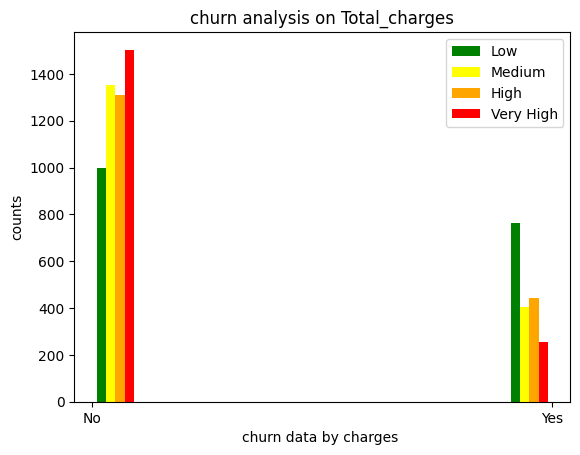

401.0 1397.0 3794.25 8684.0


In [274]:
charges_bin_low = df[df["TotalCharges_Bin"]==df["TotalCharges_Bin"].unique()[0]]["Churn"]
charges_bin_Medium = df[df["TotalCharges_Bin"]==df["TotalCharges_Bin"].unique()[1]]["Churn"]
charges_bin_high = df[df["TotalCharges_Bin"]==df["TotalCharges_Bin"].unique()[2]]["Churn"]
charges_bin_Very_high= df[df["TotalCharges_Bin"]==df["TotalCharges_Bin"].unique()[3]]["Churn"]

plt.hist([charges_bin_low,charges_bin_Medium,charges_bin_high,charges_bin_Very_high],color=['#008000', '#FFFF00', '#FFA500', '#FF0000'], \
         label = ["Low","Medium","High","Very High"])
plt.xlabel("churn data by charges ")
plt.ylabel("counts")
plt.title("churn analysis on Total_charges")
plt.legend()
plt.show()
print(df["TotalCharges"].quantile(0.25),df["TotalCharges"].quantile(0.50),df["TotalCharges"].quantile(0.75),df["TotalCharges"].quantile(1.0))

In [275]:
charges_bin_low.value_counts()

,count
Churn,
No,997
Yes,764


In [276]:
#applying label encoding to convery or otherwise u can usse map function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_obj:
    if df[i].nunique() == 2:
        df[i]=le.fit_transform(df[i])

In [277]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [278]:
# Initialize an empty DataFrame to store dummy variables
df_dummies = pd.DataFrame()

for i in df_obj:
    if df[i].nunique() > 2:
        if i == "TotalCharges":  # Skip TotalCharges column
            continue
        else:
            # Create dummies and concatenate with the existing df_dummies
            temp_df = pd.get_dummies(df[i], prefix=i, drop_first=True, dtype=int)
            df_dummies = pd.concat([df_dummies, temp_df], axis=1)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns
# Update df_obj to contain only object columns with >2 unique values
df_obj_updated = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).nunique() > 2]
#df_obj_updated = df_obj_updated.drop('TotalCharges', errors='ignore')  # Exclude 'TotalCharges'

# Drop the original categorical columns
df.drop(columns=df_obj_updated, inplace=True, errors='ignore')

In [279]:
# Initialize an empty DataFrame to store dummy variables
df_dummies = pd.DataFrame()

# Get a list of object columns with more than 2 unique values (excluding 'TotalCharges')
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns
                    if df[col].nunique() > 2 and col != 'TotalCharges']

# Create dummy variables for selected columns and concatenate
for col in categorical_cols:
    temp_df = pd.get_dummies(df[col], prefix=col, drop_first=True, dtype=int)
    df_dummies = pd.concat([df_dummies, temp_df], axis=1)

# Concatenate dummy variables with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns
df.drop(columns=categorical_cols, inplace=True)

In [280]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306,1,...,0,0,0,0,0,0,0,0,0,1


In [281]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,int64
Churn,int64


In [282]:
df.drop(columns=["TotalCharges_Bin"],inplace = True)

#**Cheking outliers**

<Axes: >

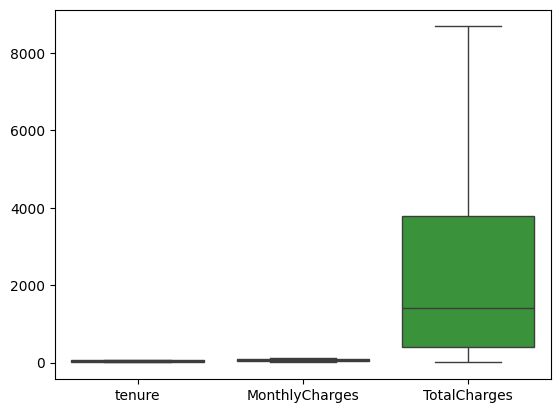

In [284]:
columns_ = ["tenure","MonthlyCharges","TotalCharges"]
sns.boxplot(df[columns_])

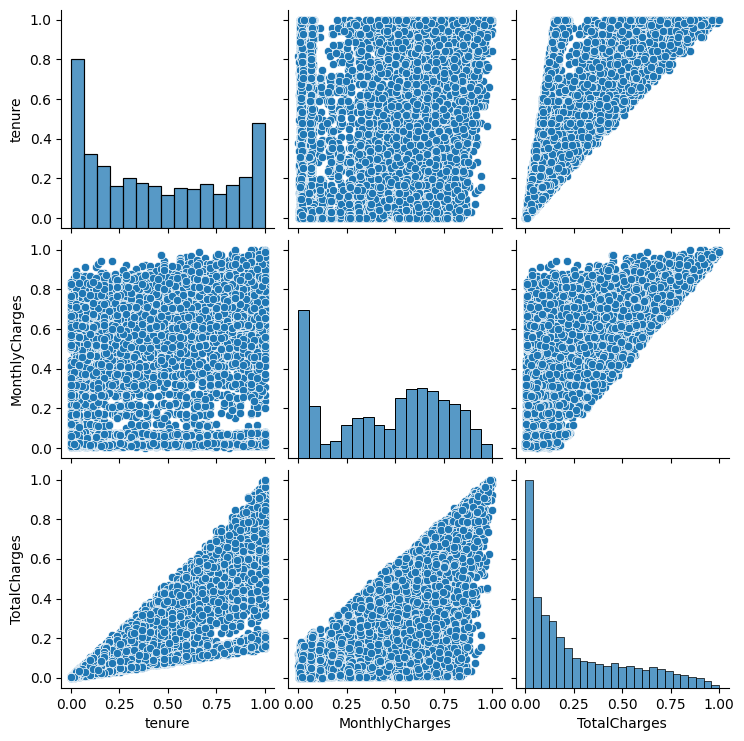

In [304]:
sns.pairplot(df[columns_])

In [285]:
columns_ = ["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df[columns_] = mm.fit_transform(df[columns_])

In [286]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,1,0.115423,0.001269,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,0.385075,0.215901,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,1,0.354229,0.010385,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,0.239303,0.210247,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,1,0.521891,0.015347,1,...,0,0,0,0,0,0,0,0,1,0


In [287]:
#spliting the datset into train and text
x = df.drop(columns=["Churn"],axis = 1)
y = df["Churn"]
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [288]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,0
Churn,0


In [289]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,float64
PhoneService,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64


In [290]:
df.reset_index(drop=True, inplace=True)

In [291]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 42)
x_train.shape,y_train.shape

((5625, 30), (5625,))

In [292]:
x_train[:15]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,1,0,1,1,0.901408,1,0,0.759204,0.699285,0,...,1,0,0,0,0,0,1,1,0,0
7003,1,0,0,0,0.352113,0,0,0.174129,0.115855,1,...,1,0,0,0,0,0,0,0,1,0
3355,0,0,1,0,0.943662,1,0,0.715920,0.724556,0,...,1,0,0,0,0,0,1,1,0,0
4494,1,0,0,0,0.028169,1,0,0.657214,0.025040,0,...,0,0,0,0,1,0,0,0,1,0
3541,0,0,1,0,0.676056,0,0,0.222886,0.236787,1,...,0,0,1,0,0,0,0,0,0,0
349,0,1,1,0,0.887324,1,0,0.783582,0.739903,0,...,0,0,0,0,1,1,0,0,0,0
564,1,0,0,0,0.084507,1,0,0.458209,0.049273,0,...,1,0,1,0,0,0,0,0,0,0
3257,1,0,0,0,0.295775,1,1,0.745771,0.246827,0,...,0,0,1,0,1,0,0,0,0,1
6548,1,0,1,1,0.422535,1,0,0.359204,0.187976,0,...,1,0,0,0,0,0,0,0,0,1
4965,0,0,0,0,0.070423,0,1,0.295522,0.033118,1,...,0,0,1,0,1,0,0,0,1,0


In [293]:
y_train.value_counts()

,count
Churn,
0,4130
1,1495


In [294]:
y_train[:15]

,Churn
1413,0
7003,0
3355,0
4494,0
3541,0
349,0
564,0
3257,0
6548,0
4965,1


#**MODEL BUILDING**

In [295]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6461 - loss: 0.5897
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7956 - loss: 0.4320
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7988 - loss: 0.4120
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8059 - loss: 0.4174
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8005 - loss: 0.4119
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.4248
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8098 - loss: 0.4047
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.4016
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8131 - loss: 0.3973
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8124 - loss: 0.4070
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8077 - loss: 0.4098
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [296]:
import tensorflow as tf
from tensorflow import keras


model_sgd = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model_sgd.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_sgd.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6719 - loss: 0.6223
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7330 - loss: 0.5249
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7478 - loss: 0.4798
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7621 - loss: 0.4679
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7655 - loss: 0.4693
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7876 - loss: 0.4474
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 0.4223
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4341
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7935 - loss: 0.4310
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8015 - loss: 0.4170
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7987 - loss: 0.4275
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [297]:
model.evaluate(x_train,y_train)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8467 - loss: 0.3370


[0.34453773498535156, 0.8399999737739563]

In [298]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7684 - loss: 0.4817


[0.4796202480792999, 0.778251588344574]

In [299]:
y_pred = model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [300]:
y_pred[:5]

array([[0.0048269 ],
       [0.89614606],
       [0.00330983],
       [0.24403317],
       [0.16302405]], dtype=float32)

In [301]:
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

Text(95.72222222222221, 0.5, 'Truth')

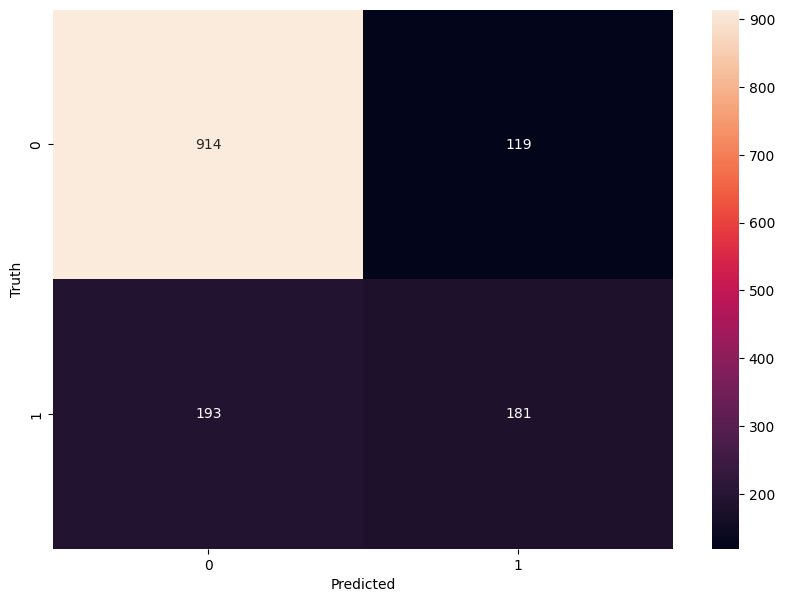

In [302]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [303]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

